In [ ]:
import keras


Using TensorFlow backend.


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده</div>


`https://www.kaggle.com/c/dogs-vs-cats/data`



![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets. The best entries could achieve up to 
95% accuracy. In our own example, we will get fairly close to this accuracy (in the next section), even though we will be training our 
models on less than 10% of the data that was available to the competitors.
This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). After downloading 
and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation 
set with 500 samples of each class, and finally a test set with 500 samples of each class.

Here are a few lines of code to do this:

In [1]:
import os, shutil
import tensorflow as tf
import pathlib
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
np.set_printoptions(precision=4)

In [ ]:
# install imageatm via PyPi
#!pip install imageatm

In [ ]:
# download cats and dogs dataset
#!wget --no-check-certificate \
 #   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  #  -O cats_and_dogs_filtered.zip
  

In [ ]:
# unzip dataset and create working directory
#!unzip cats_and_dogs_filtered.zip
#!mkdir -p cats_and_dogs/train
#!mv cats_and_dogs_filtered/train/cats/* cats_and_dogs/train
#!mv cats_and_dogs_filtered/train/dogs/* cats_and_dogs/train

In [2]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip',origin=URL,extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 2s 0us/step


In [3]:
from sys import path
train_dir = os.path.join(PATH,'train')
validation_dir =os.path.join(PATH,'validation')

In [ ]:
tf.shape

In [ ]:
train_dir

In [32]:
batch_size=32
image_size=(160,160)

train_dataset=image_dataset_from_directory(train_dir,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           image_size=image_size)

Found 2000 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=image_size)


Found 1000 files belonging to 2 classes.


In [6]:
validation_batches=tf.data.experimental.cardinality(validation_dataset)
print('number of validation_batch:%d'% tf.data.experimental.cardinality(validation_dataset))

number of validation_batch:32


In [7]:
test_batches=validation_batches//5

In [8]:
test_dataset=validation_dataset.take(test_batches)
print('NUMBER OF TEST BATCHES:%d '% tf.data.experimental.cardinality(test_dataset))

NUMBER OF TEST BATCHES:6 


In [9]:
validation_dataset=validation_dataset.skip(test_batches)
print('Number of validation batches:%d'% tf.data.experimental.cardinality(validation_dataset))

Number of validation batches:26


In [10]:
class_names = train_dataset.class_names
class_names

['cats', 'dogs']

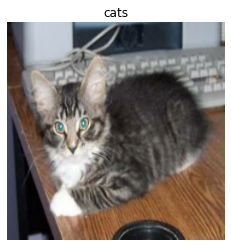

In [11]:
for img ,lable in train_dataset.take(1):
  img=img.numpy().astype("uint8")
  plt.imshow( img[15])
  plt.title(class_names[lable[15]])
  plt.axis('off')
  plt.show

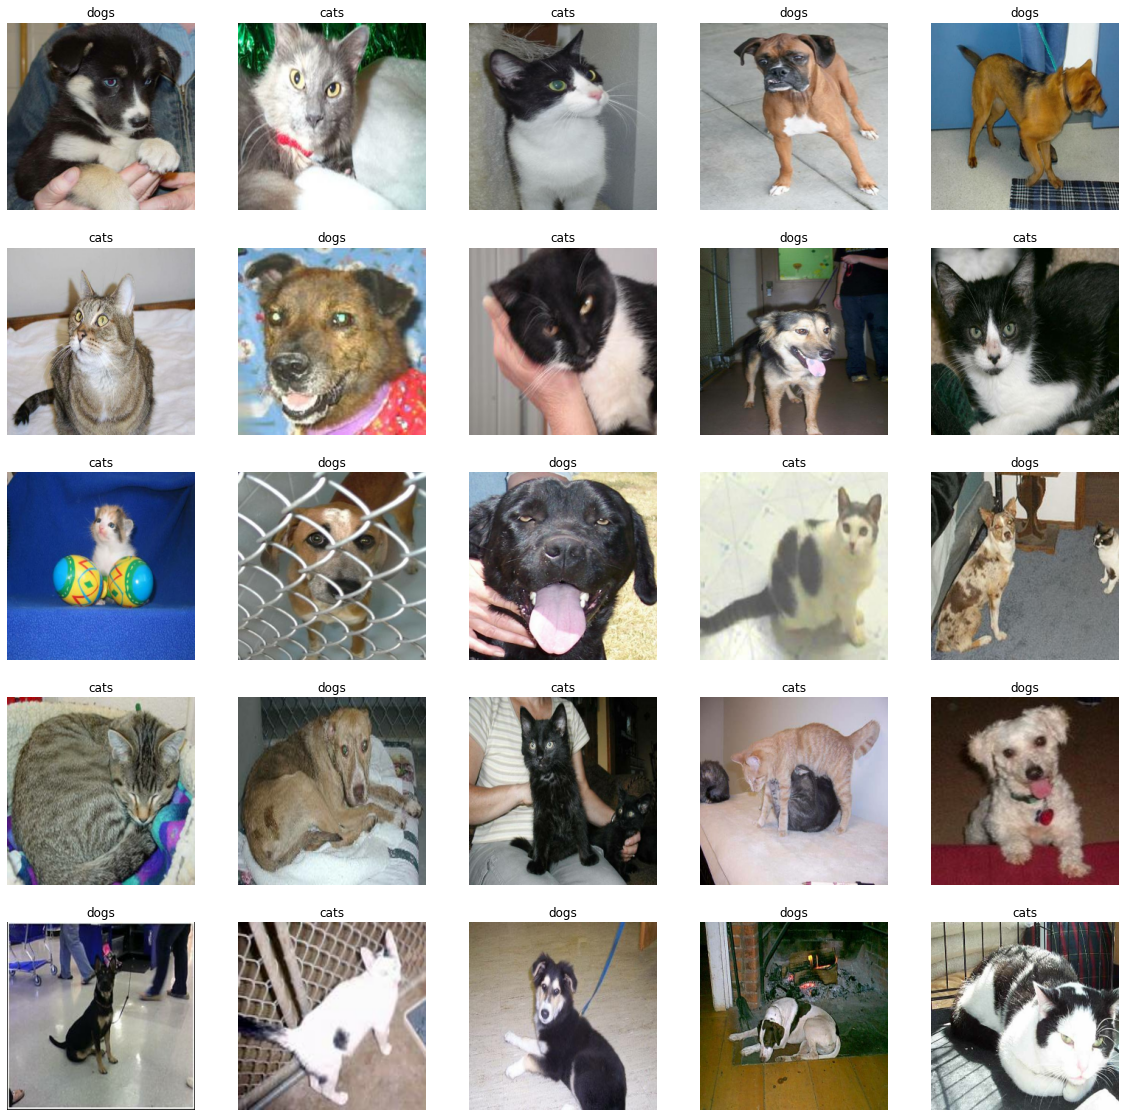

In [12]:
plt.figure(figsize=(20, 20))
for img, labels in train_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
#Configure the dataset for performance
#Use buffered prefetching to load images from disk without having I/O become blocking.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [15]:
#Data augmentation on training set
data_augmentation=tf.keras.Sequential([
     tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
     tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
     ])

In [16]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

first image shape:(255, 255, 3)
Expaned dims of first_image :(1, 255, 255, 3)


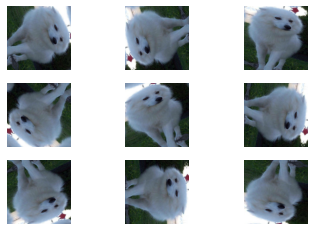

In [17]:
for image,label in train_dataset.take(1):
  first_image=image[13]
  print(f'first image shape:{first_image.shape}')
  expaned_dims_first_image=tf.expand_dims(first_image,0)
  print(f'Expaned dims of first_image :{expaned_dims_first_image.shape}')

  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    augmented_image=data_augmentation(expaned_dims_first_image)
    #rescale augmented image
    augmented_image=augmented_image[0]/255
    plt.imshow(augmented_image)
    plt.axis('off')

In [18]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input

<function keras.applications.mobilenet.preprocess_input(x, data_format=None)>

In [19]:
image_size
image_shape=image_size+(3,)

In [20]:
model=tf.keras.applications.MobileNetV2(input_shape=image_shape
                                         ,include_top=False
                                         ,weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [21]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model(image_batch)
print(feature_batch.shape)

(32, 8, 8, 1280)


In [22]:
model.trainable = False

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255, 255, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [25]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [26]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model

For our compilation step, we'll go with the `RMSprop` optimizer as usual. Since we ended our network with a single sigmoid unit, we will 
use binary crossentropy as our loss (as a reminder, check out the table in Chapter 4, section 5 for a cheatsheet on what loss function to 
use in various situations).

In [27]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                             

In [29]:
len(model.trainable_variables)

2

In [33]:
loss0, accuracy0 = model.evaluate(validation_dataset)

ValueError: ignored

In [31]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

NameError: ignored

In [ ]:
EPOCHS = 10
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 7s 63ms/step - loss: 0.6965 - accuracy: 0.6010 - val_loss: 0.5070 - val_accuracy: 0.7116
Epoch 2/10
63/63 [==============================] - 4s 59ms/step - loss: 0.5086 - accuracy: 0.7215 - val_loss: 0.3906 - val_accuracy: 0.7785
Epoch 3/10
63/63 [==============================] - 4s 59ms/step - loss: 0.4220 - accuracy: 0.7930 - val_loss: 0.3036 - val_accuracy: 0.8552
Epoch 4/10
63/63 [==============================] - 4s 60ms/step - loss: 0.3483 - accuracy: 0.8390 - val_loss: 0.2555 - val_accuracy: 0.8874
Epoch 5/10
63/63 [==============================] - 4s 59ms/step - loss: 0.3106 - accuracy: 0.8560 - val_loss: 0.2163 - val_accuracy: 0.9134
Epoch 6/10
63/63 [==============================] - 4s 59ms/step - loss: 0.2854 - accuracy: 0.8730 - val_loss: 0.1908 - val_accuracy: 0.9171
Epoch 7/10
63/63 [==============================] - 4s 60ms/step - loss: 0.2585 - accuracy: 0.8890 - val_loss: 0.1702 - val_accuracy: 0.9295
Epoch 8/10
63

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

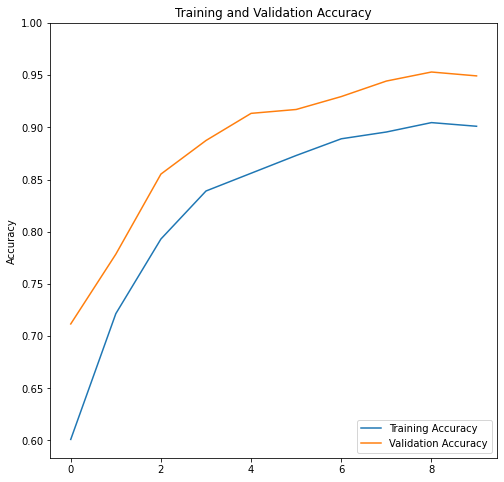

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

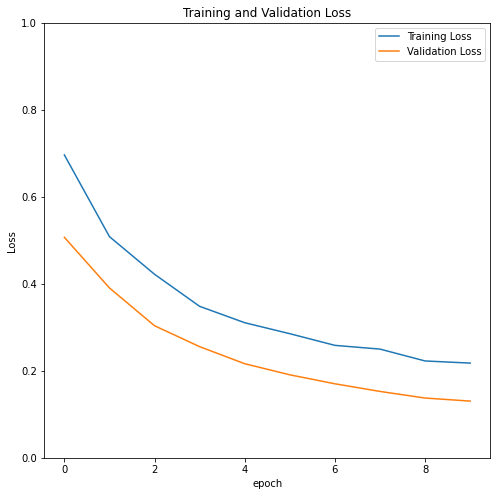

In [ ]:
plt.figure (figsize=(8, 8))

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
print("Number of layers in the base model: ", len(model.layers))

Number of layers in the base model:  8


In [ ]:
model.trainable = True# Fine-tune from this layer onwards
fine_tune_at = 100# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
    layer.trainable =  False

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
len(model.trainable_variables)

0

In [ ]:
FINE_TUNE_EPOCHS = 10
TOTAL_EPOCHS=EPOCHS+FINE_TUNE_EPOCHS
history_fine = model.fit(train_dataset,
                         epochs=TOTAL_EPOCHS,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 7s 69ms/step - loss: 0.2190 - accuracy: 0.9015 - val_loss: 0.1314 - val_accuracy: 0.9530
Epoch 11/20
63/63 [==============================] - 4s 64ms/step - loss: 0.2126 - accuracy: 0.9075 - val_loss: 0.1340 - val_accuracy: 0.9493
Epoch 12/20
63/63 [==============================] - 4s 59ms/step - loss: 0.2099 - accuracy: 0.9045 - val_loss: 0.1299 - val_accuracy: 0.9493
Epoch 13/20
63/63 [==============================] - 4s 58ms/step - loss: 0.1956 - accuracy: 0.9195 - val_loss: 0.1328 - val_accuracy: 0.9493
Epoch 14/20
63/63 [==============================] - 4s 59ms/step - loss: 0.2047 - accuracy: 0.9135 - val_loss: 0.1329 - val_accuracy: 0.9542
Epoch 15/20
63/63 [==============================] - 4s 58ms/step - loss: 0.2061 - accuracy: 0.9120 - val_loss: 0.1294 - val_accuracy: 0.9530
Epoch 16/20
63/63 [==============================] - 4s 59ms/step - loss: 0.2160 - accuracy: 0.9035 - val_loss: 0.1272 - val_accuracy: 0.9567
Epoch 

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

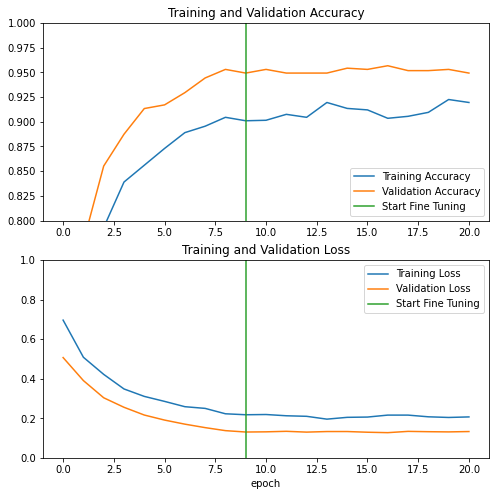

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([EPOCHS-1,EPOCHS-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([EPOCHS-1,EPOCHS-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

6/6 [==============================] - 1s 43ms/step - loss: 0.1430 - accuracy: 0.9531


In [ ]:
print('Test loss :', loss)
print('Test accuracy :', accuracy)

Test loss : 0.14302416145801544
Test accuracy : 0.953125


In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
print(predictions)

[ 1.9395086 -2.1332889 -3.5446439 -3.8722553 -6.0344377 -6.223408
  2.1119628  3.3091283 -3.8917918 -0.3412532  2.2315419 -4.3952193
  3.0236754  3.2125254  2.1390564  3.9362087 -4.1634884  4.984828
 -3.5350337  4.238998   1.6939143  2.6217124  3.1614542  4.0116396
  1.0215096 -2.4593377 -3.0903854 -4.7898984 -5.0986705 -2.4459906
  3.3028498  2.7029395]


In [ ]:
# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

Predictions:
 [1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1]
Labels:
 [1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1]


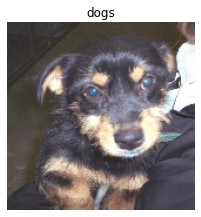

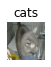

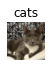

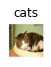

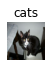

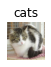

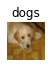

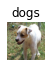

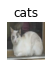

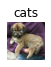

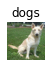

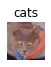

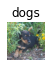

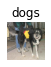

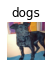

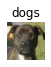

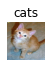

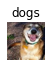

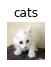

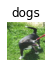

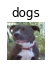

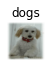

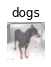

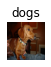

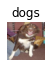

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")
    plt.show()